In [118]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

## **Step 1 : Load and Explore Data**

In [120]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [121]:
print(f"X_train = {X_train.shape}")
print(f"X_test = {X_test.shape}")

X_train = (60000, 28, 28)
X_test = (10000, 28, 28)


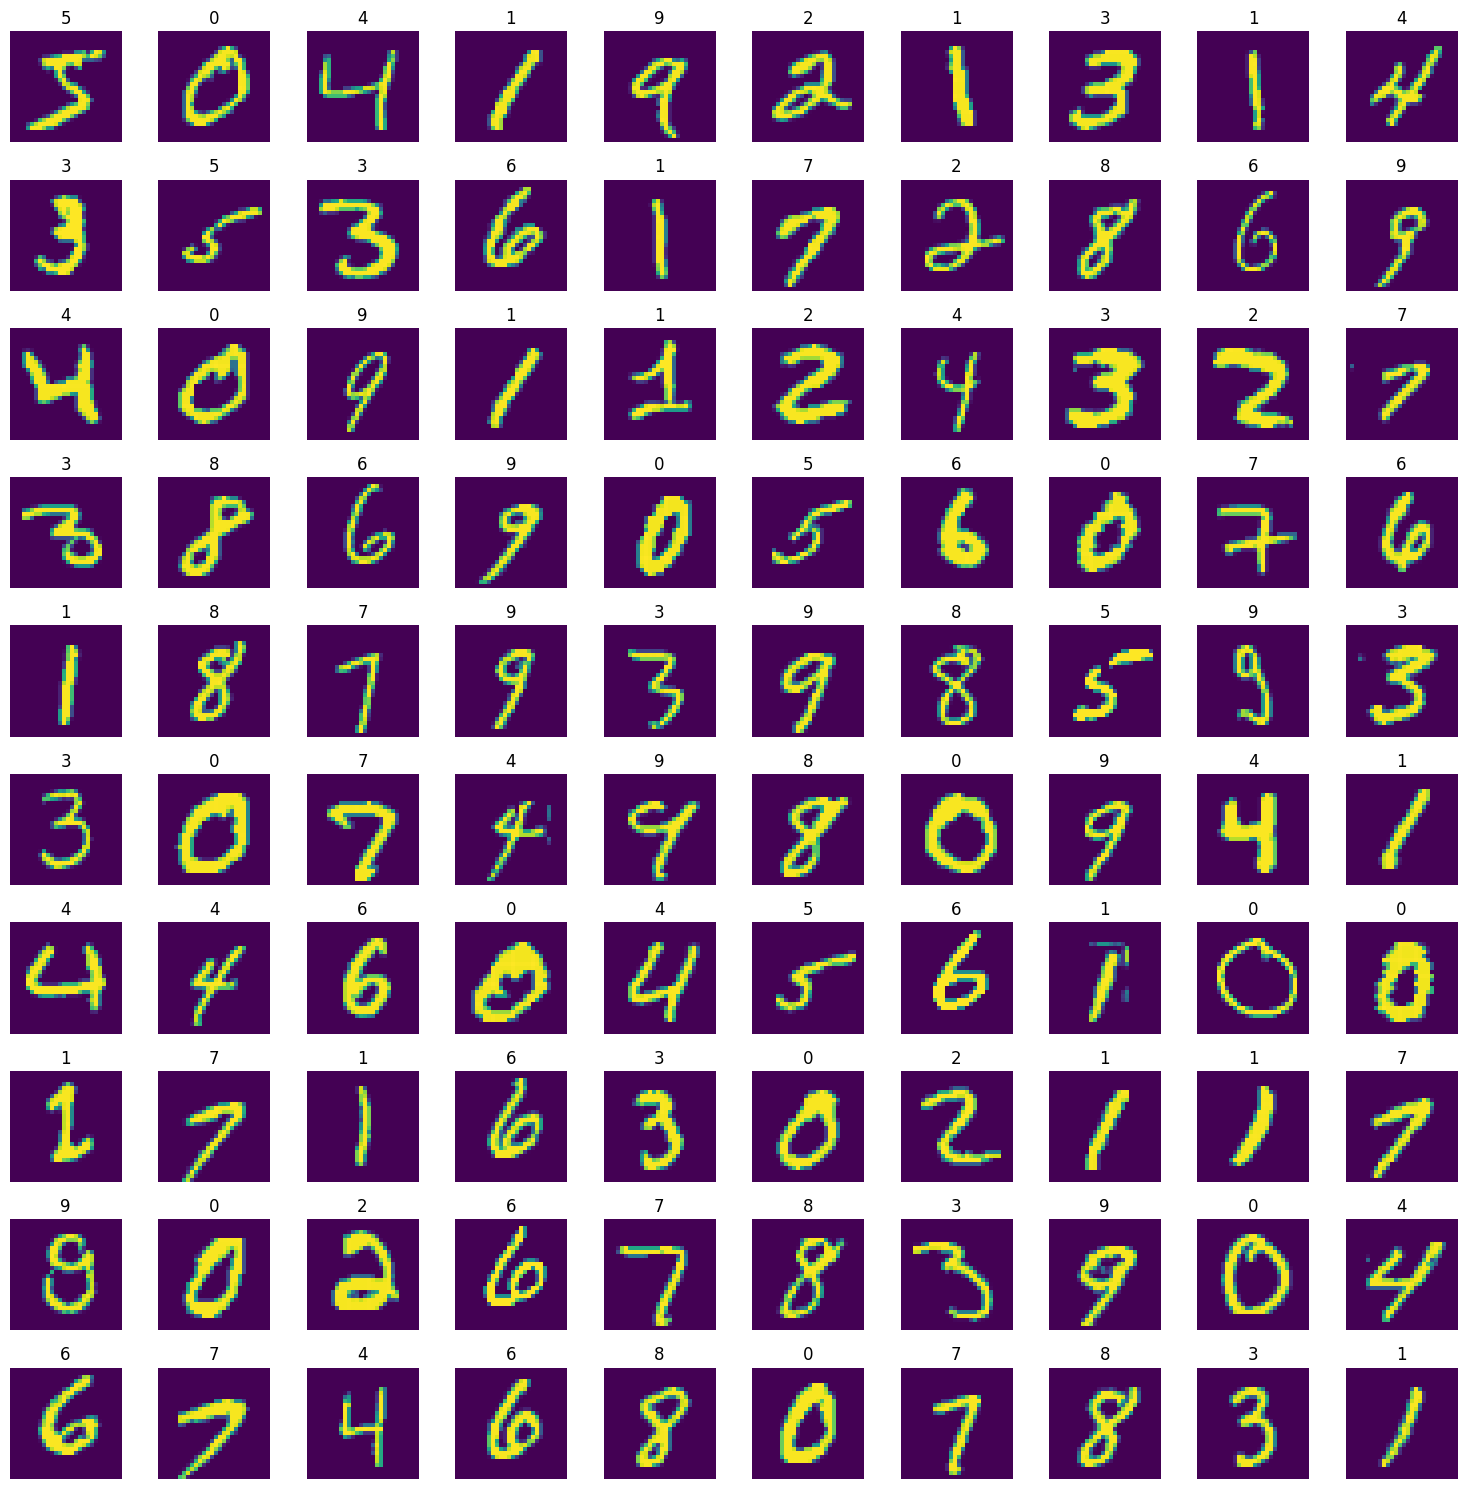

In [122]:
fig = plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')

    img = X_train[i]
    plt.imshow(img)
    plt.title(y_train[i])
plt.tight_layout()

## **Step 2 : Preprocessing**

In [123]:
def stand_fit (arr):
    """
    given an array, this function finds the mean and standard deviation
    args:
        arr (ndarray (m, n)) : m examples and n features
    returns:
        mean, std (ndarray (n, )) : mean and standard deviation of each feature
    """
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    return mean, std

In [124]:
def stand_transform (arr, mean, std):
    """
    Normalize array using Z_score Normalization (standardization) with the given mean and std

    args:
        arr (ndarray (m, n)) : an array with m examples and n features
        mean , std (ndarray (n)) : mean and std for each n features
    returns:
        norm_arr (ndarray (m, n)): Normalized array
    """
    epsilon = 1e-15
    norm_arr = (arr - mean) / (std + epsilon)
    return norm_arr

In [125]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [126]:
mean, std = stand_fit(X_train)

In [127]:
X_train_norm = stand_transform(X_train, mean, std)

## **Step 3 : Build Model**

In [128]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=128, activation='relu', name='Layer1'),
    tf.keras.layers.Dense(units=64, activation='relu', name='Layer2'),
    tf.keras.layers.Dense(units=32, activation='relu', name='Layer3'),
    tf.keras.layers.Dense(units=16, activation='relu', name='Layer4'),
    tf.keras.layers.Dense(units=8, activation='relu', name='Layer5'),
    tf.keras.layers.Dense(units=4, activation='relu', name='Layer6'),
    tf.keras.layers.Dense(units=2, activation='relu', name='Layer7'),
    tf.keras.layers.Dense(units=10, activation='linear', name='output')
]
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer4 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer5 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer6 (Dense)                  │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer7 (Dense)                  │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,556 (435.77 KB)

 Trainable params: 111,556 (435.77 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 4: Compile the Model**

In [129]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics= ['accuracy']
)

## **Step 5: Train Model**

In [130]:
hist = model.fit(X_train_norm, y_train, epochs=25, batch_size=64)

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3855 - loss: 1.5794
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7687 - loss: 0.8101
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8439 - loss: 0.5444
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8582 - loss: 0.4095
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8692 - loss: 0.3317  
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8780 - loss: 0.2932
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8774 - loss: 0.2785
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9344 - loss: 0.2533
Epoch 9/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9690 - loss: 0.1648
Epoch 10/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9739 - loss: 0.1298
Epoch 11/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9750 - loss: 0.1210
Epoch 12/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 

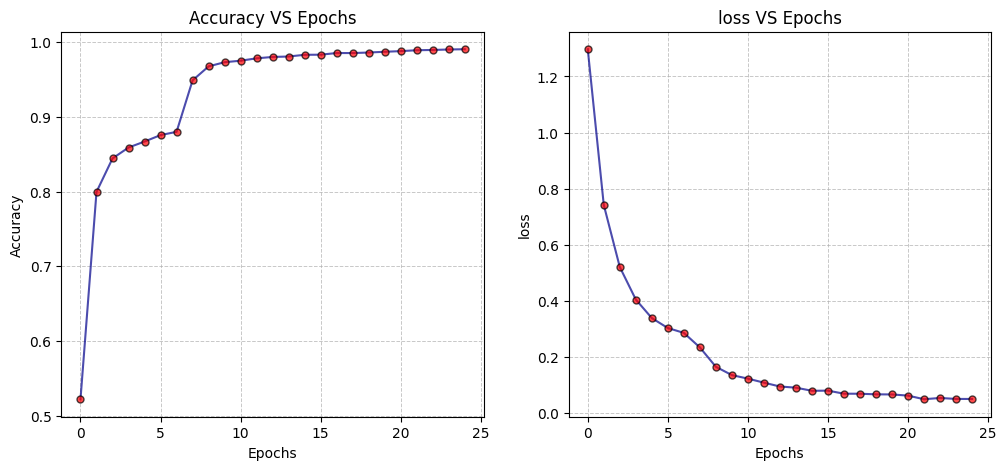

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = ax.flatten()

ax[0].plot(hist.history['accuracy'], color='darkblue', marker='o', markersize=5, alpha=0.7, markeredgecolor='black', markerfacecolor='red')
ax[0].grid(True, lw=0.7, alpha=0.7, linestyle='--')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy VS Epochs')

ax[1].plot(hist.history['loss'], color='darkblue', marker='o', markersize=5, alpha=0.7, markeredgecolor='black', markerfacecolor='red')
ax[1].grid(True, lw=0.7, alpha=0.7, linestyle='--')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('loss VS Epochs');

## **Step 6: Evaluate Model**

In [132]:
loss_train, accuracy_train = model.evaluate(X_train_norm, y_train, batch_size=64)
print(f'Train Accuracy = {accuracy_train * 100:.2f} %')

X_test = X_test.reshape(X_test.shape[0], -1)
X_test_norm = stand_transform(X_test, mean, std)
loss_test , accuracy_test = model.evaluate(X_test_norm, y_test, batch_size=64)
print(f'Train Accuracy = {accuracy_test * 100:.2f} %')


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9919 - loss: 0.0380
Train Accuracy = 99.23 %
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9604 - loss: 197991366656.0000
Train Accuracy = 96.58 %


## **Step 7: Prediction**

In [133]:
output = model.predict(X_test_norm, batch_size=32)
y_test_sm = tf.nn.softmax(output)
y_test_labels = np.argmax(y_test_sm, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [134]:
mask = y_test_labels != y_test
X_test_mask = X_test_norm[mask]
y_test_mask = y_test_labels[mask]
missclassications = y_test_mask.shape[0]
print(f"Number of MisClassifications : {missclassications}")

Number of MisClassifications : 343


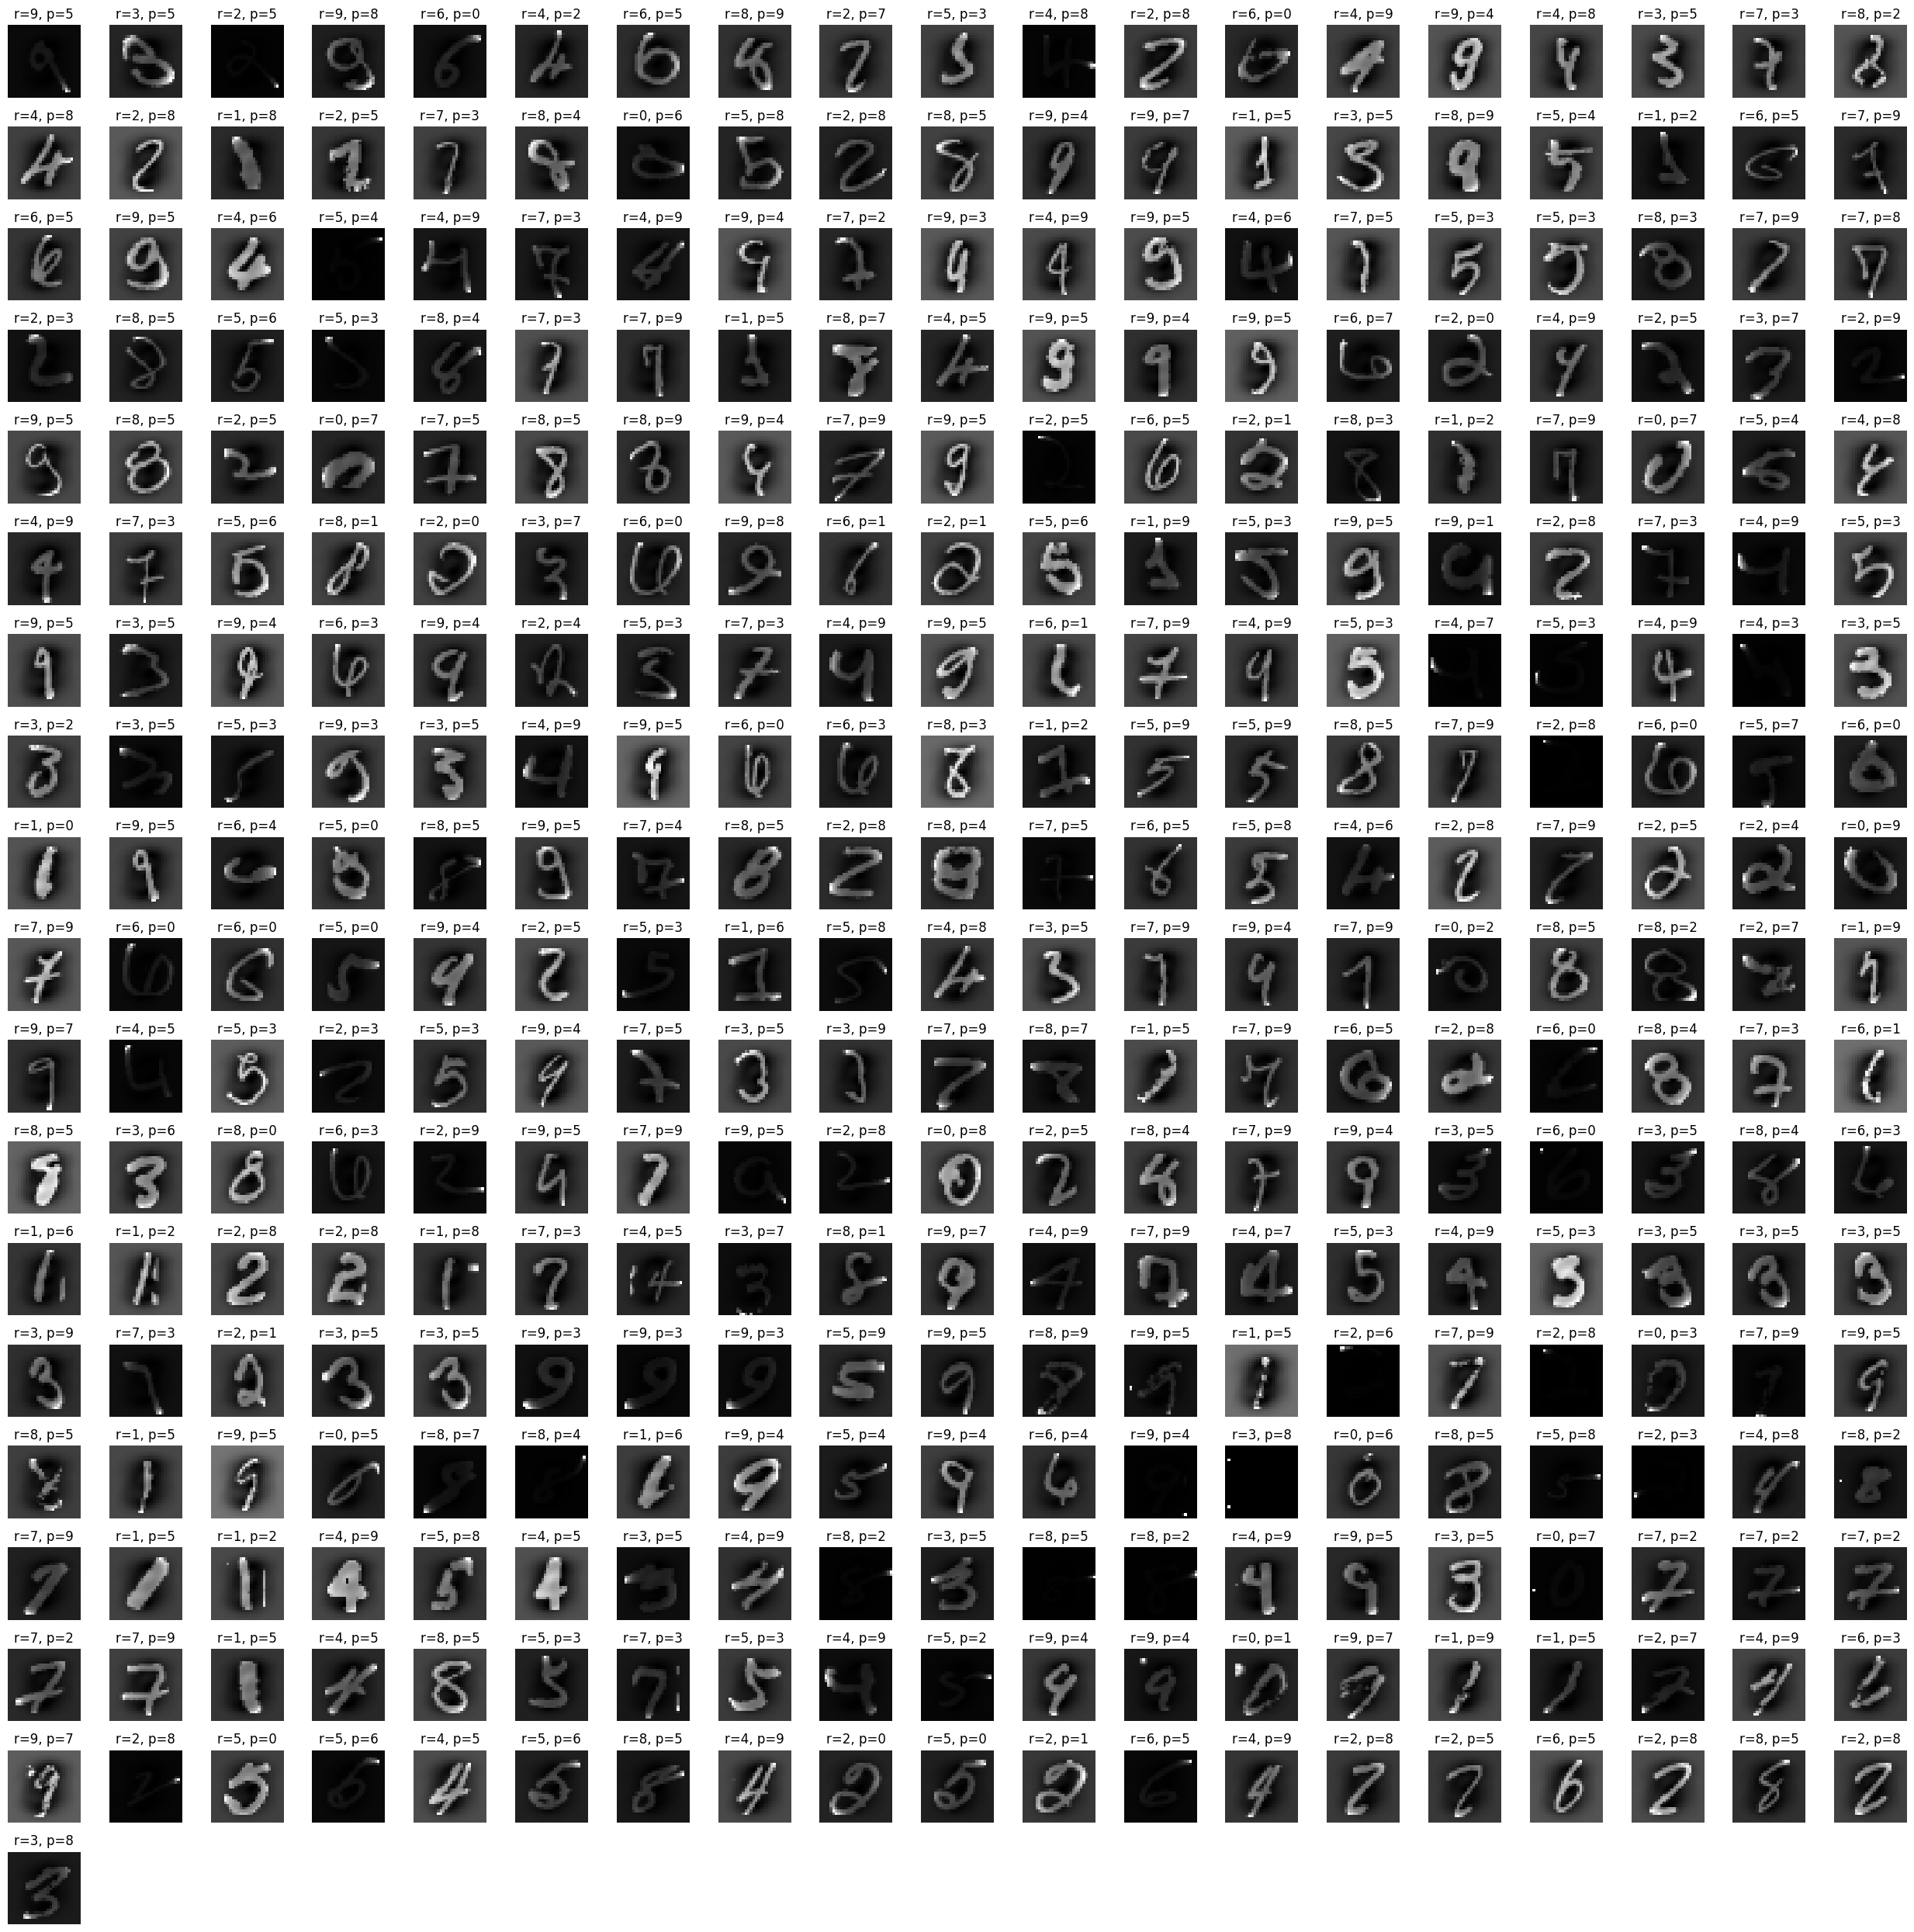

In [135]:
fig = plt.figure(figsize=(25,25))

rows = int(np.ceil(np.sqrt(missclassications)))

for i in range(missclassications):
    plt.subplot(rows, rows, i+1)
    plt.axis('off')
    img = X_test_mask[i].reshape(28, 28)
    plt.imshow(img, cmap='grey')
    plt.title(f'r={y_test[mask][i]}, p={y_test_mask[i]}')
plt.tight_layout()